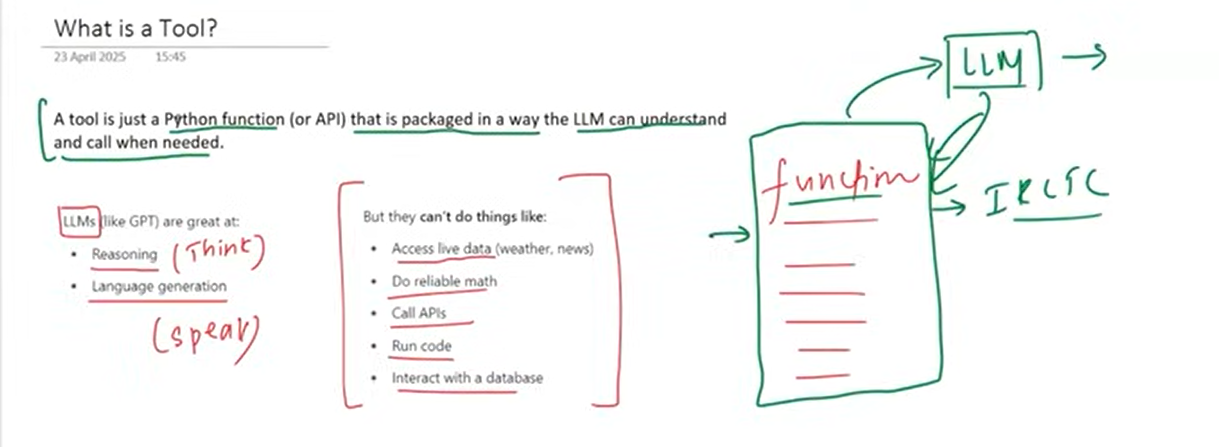
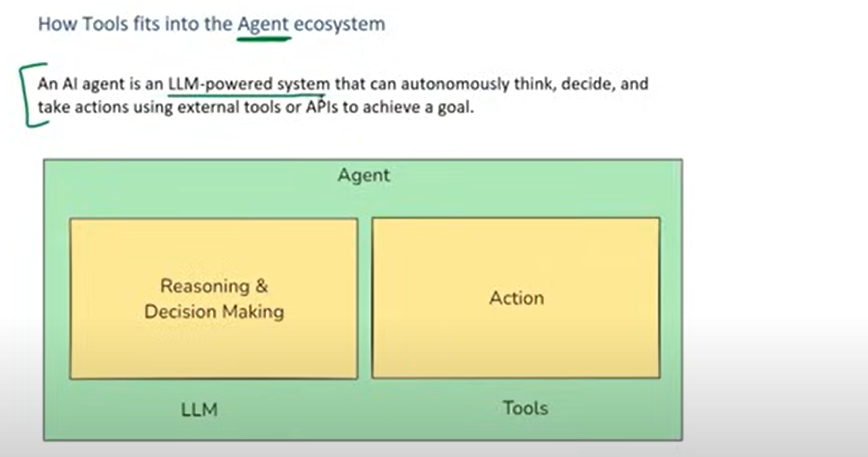

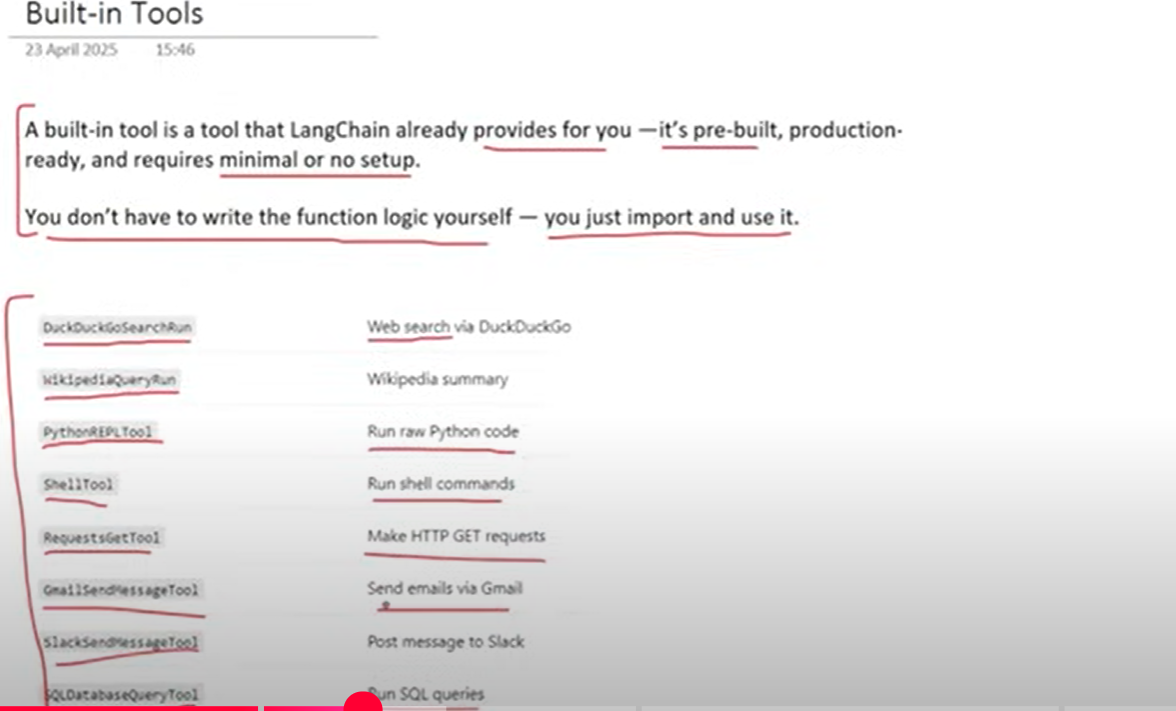

In [8]:
from langchain_community.tools import DuckDuckGoSearchRun
search_tool = DuckDuckGoSearchRun()
search_tool.invoke("Top news in Pakistan Today")

c:\Users\ashan\AppData\Local\Programs\Python\Python313\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


'Pakistan’s most trusted outlet for the breaking, latest and top news across the country and the world.Newspaper Web Archive. Front Page; National; National; National; National; …Pakistan - Latest - DAWN.COMBusiness - Latest - DAWN.COMOpinion - Latest - DAWN.COM Pakistan Latest & Breaking News updates on Politics, Current Affairs, Sports,Technology, Entertainment & Business all at one place.. Jun 8, 2025 · The News International - latest news and breaking news about Pakistan, world, sports, cricket, business, entertainment, weather, education, lifestyle; opinion & blog | brings … 3 days ago · Stay on top of Pakistan latest developments on the ground with Al Jazeera’s fact-based news, exclusive video footage, photos and updated maps. Geo News provides latest and breaking news.'

In [10]:
from langchain_community.tools import ShellTool
shell_tool =  ShellTool()
shell_tool.invoke("whoami")

c:\Users\ashan\AppData\Local\Programs\Python\Python313\Lib\site-packages\langchain_community\tools\shell\tool.py:33: UserWarning: The shell tool has no safeguards by default. Use at your own risk.
  warnings.warn(


Executing command:
 whoami


'desktop-374itvg\\ashan\r\n'

In [13]:
shell_tool.invoke("md new_fold")  # creating new folder

Executing command:
 md new_fold


c:\Users\ashan\AppData\Local\Programs\Python\Python313\Lib\site-packages\langchain_community\tools\shell\tool.py:33: UserWarning: The shell tool has no safeguards by default. Use at your own risk.
  warnings.warn(


''

##### See documentation for more tools (Search tools hain bht sare isis trh diff diff tools hain)

# Custom Tools 3 stp process hota hy

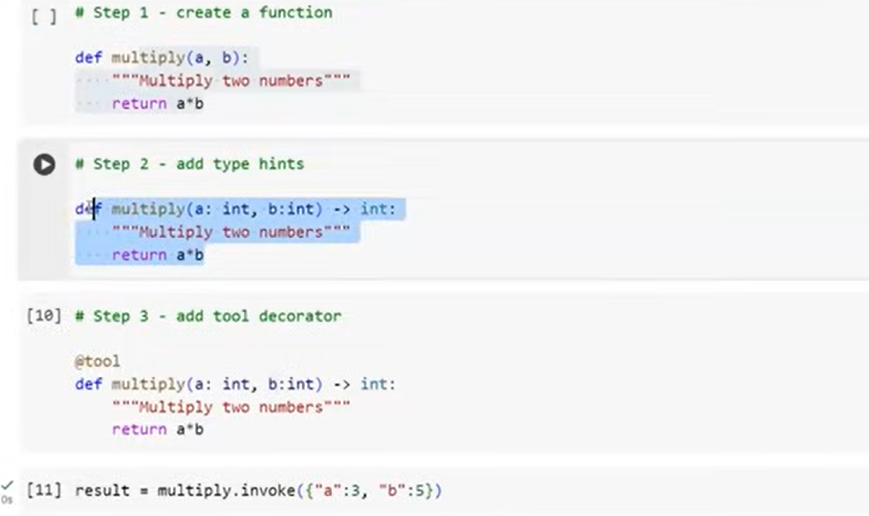

In [36]:
# Method 1
from langchain_community.tools import tool
@tool
def multiply(a:int,b:int) -> int:
    """Multiply two integer"""  # its good to add  doc string  
    return a*b

In [16]:
multiply.invoke({"a":4,"b":3})

12

In [17]:
print(multiply.name)
print(multiply.description)
print(multiply.args)

multiply
Multiply two integer
{'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}


In [20]:
multiply.args_schema.model_json_schema()  # ye jata hy  llm ke pas na ke code jata hy
# ye tool ka schame hy hum y bhejte hain llm ko

{'description': 'Multiply two integer',
 'properties': {'a': {'title': 'A', 'type': 'integer'},
  'b': {'title': 'B', 'type': 'integer'}},
 'required': ['a', 'b'],
 'title': 'multiply',
 'type': 'object'}

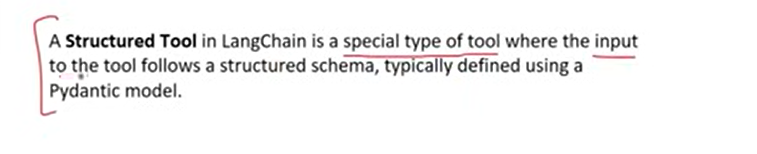

In [37]:
# Method 2
from langchain.tools import StructuredTool
from pydantic import BaseModel,Field

In [22]:
class multiplyInput(BaseModel):
    a : int = Field(required = True , description="The first number to add")
    b : int = Field(required = True , description="The second number to add")

c:\Users\ashan\AppData\Local\Programs\Python\Python313\Lib\site-packages\pydantic\fields.py:1076: PydanticDeprecatedSince20: Using extra keyword arguments on `Field` is deprecated and will be removed. Use `json_schema_extra` instead. (Extra keys: 'required'). Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  warn(
c:\Users\ashan\AppData\Local\Programs\Python\Python313\Lib\site-packages\pydantic\fields.py:1076: PydanticDeprecatedSince20: Using extra keyword arguments on `Field` is deprecated and will be removed. Use `json_schema_extra` instead. (Extra keys: 'required'). Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  warn(


In [34]:
def multiply_func(a:int,b:int) -> int:
    return a*b  # docstring wagera sb kch function me nhi de rhy wo tool me de gye

In [35]:
multiply_tool = StructuredTool.from_function(
    func = multiply_func,
    name = "multiply",
    description="multiply two numbers",
    agr_schema=multiplyInput
)

In [33]:
result = multiply_tool.invoke({"a":3,"b":4})
result

12

### Method 3 Using base tool class

In [39]:
from langchain_community.tools import BaseTool
from typing import Type

In [40]:
# define schema using pydantic
class multiplyInput(BaseModel):
    a : int = Field(required = True , description="The first number to add")
    b : int = Field(required = True , description="The second number to add")

c:\Users\ashan\AppData\Local\Programs\Python\Python313\Lib\site-packages\pydantic\fields.py:1076: PydanticDeprecatedSince20: Using extra keyword arguments on `Field` is deprecated and will be removed. Use `json_schema_extra` instead. (Extra keys: 'required'). Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  warn(
c:\Users\ashan\AppData\Local\Programs\Python\Python313\Lib\site-packages\pydantic\fields.py:1076: PydanticDeprecatedSince20: Using extra keyword arguments on `Field` is deprecated and will be removed. Use `json_schema_extra` instead. (Extra keys: 'required'). Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  warn(


In [47]:
class MultiplyTool(BaseTool):
    name: str = "Multiply"
    description:str =  "Multiply two numbers"
    args_schema : Type[BaseModel] = multiplyInput
    
    def _run(self,a:int,b:int)-> int:
        return a*b

In [49]:
tool = MultiplyTool()
print(tool.invoke({"a":5,"b":7}))
print(tool.name)

35
Multiply


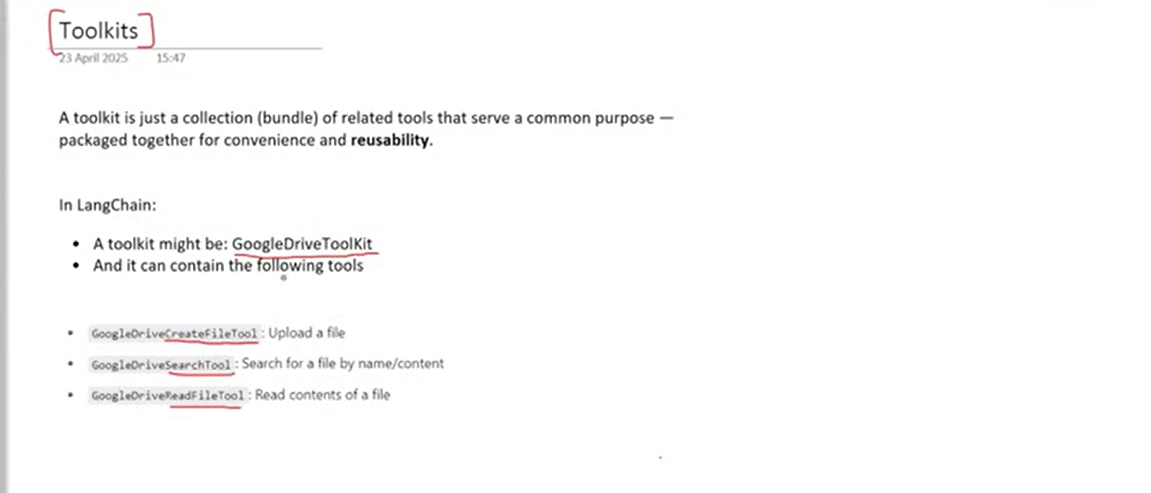

# Tool kit 1 bar bna lo phr ap apni kisi  bhi application me usko usekrlo easily (tools ki tookit)

In [50]:
from langchain_community.tools import tool
@tool
def add(a:int,b:int) -> int:
    """Add two numbers"""
    return a+b
@tool
def multiply(a:int,b:int) -> int:
    """multiply two numbers"""
    return a*b 

In [54]:
class Maths_tool:
    def get_tools(self):
        return [add,multiply]
custom_tool_kit=Maths_tool()


In [56]:
for t in custom_tool_kit.get_tools():
    print(t.name,"=>",t.description)

add => Add two numbers
multiply => multiply two numbers
